<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 일반화 : 머신 러닝의 목표 **
**5.1.1 과소적합과 과대적합**

MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _= mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
tarin_images = train_images.astype("float32")/255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
      ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 16s 38ms/step - loss: 5.6693 - accuracy: 0.8888 - val_loss: 0.8487 - val_accuracy: 0.9413
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.6407 - accuracy: 0.9479 - val_loss: 0.8995 - val_accuracy: 0.9453
Epoch 3/10
375/375 [==============================] - 8s 20ms/step - loss: 0.4492 - accuracy: 0.9612 - val_loss: 0.6340 - val_accuracy: 0.9567
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3692 - accuracy: 0.9684 - val_loss: 0.6962 - val_accuracy: 0.9620
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.3062 - accuracy: 0.9737 - val_loss: 0.7547 - val_accuracy: 0.9578
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2476 - accuracy: 0.9773 - val_loss: 0.6588 - val_accuracy: 0.9643
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.2304 - accuracy: 0.9805 - val_loss: 0.7888 - val_accuracy: 0.960

검증 정확도 비교 그래프 그리기

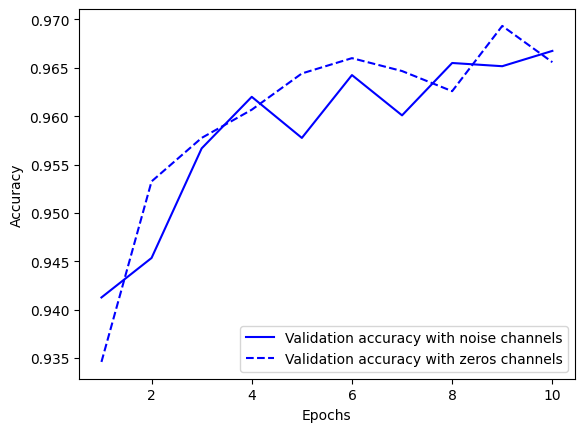

In [3]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 13ms/step - loss: 2.3145 - accuracy: 0.1058 - val_loss: 2.3094 - val_accuracy: 0.1014
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2992 - accuracy: 0.1163 - val_loss: 2.3123 - val_accuracy: 0.1043
Epoch 3/100
375/375 [==============================] - 6s 16ms/step - loss: 2.2911 - accuracy: 0.1268 - val_loss: 2.3178 - val_accuracy: 0.0995
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2787 - accuracy: 0.1373 - val_loss: 2.3248 - val_accuracy: 0.1016
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2630 - accuracy: 0.1503 - val_loss: 2.3487 - val_accuracy: 0.0973
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2428 - accuracy: 0.1649 - val_loss: 2.3602 - val_accuracy: 0.0977
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2193 - accuracy: 0.1826 - val_loss: 2.3750 - val_accuracy: